In [2]:
##########################################
# CREDO dataset analysis using PCA-based embedding
# Author: Tomasz Hachaj
# e-mail: thachaj@agh.edu.pl
# 2025
##########################################
# Perform eigendecomposition of raw dataset with PCA

import cv2
import numpy as np
import os
from random import sample
path_to_data = 'data'
path_to_results = 'pca.res_CREDO'
how_many_images = 3500
# depending on dataset size we either transpose v matrix or not
flip_mat = False
# load image data, rows consist pixels, columns images
T = np.load(path_to_data + "//CREDO_T_st_" + str(how_many_images) + ".npy")
# original shape of images
old_shape = np.load(path_to_data + "//CREDO_old_shape_st_" + str(how_many_images) + ".npy")


In [3]:
print('Calculate mean face')
mean_face = T.mean(axis = 1)
# subtract mean face from data
for i in range(how_many_images):
    T[:,i] -= mean_face


print('Calculate covariance')
if flip_mat:
    C = np.matmul(T.transpose(), T)
else:
    C = np.matmul(T, T.transpose())

C = C / how_many_images

print('Calculate eigenfaces')
from scipy.linalg import eigh
w, v = eigh(C)

if flip_mat:
    v_correct = np.matmul(T, v)
else:
    v_correct = v

# sort eigenvalues by descending order
sort_indices = w.argsort()[::-1]
w = w[sort_indices]  # put the values in that order
v_correct = v_correct[:, sort_indices]

# find the norm of each eigenvector
norms = np.linalg.norm(v_correct, axis=0)
v_correct = v_correct / norms

from pathlib import Path
Path(path_to_results).mkdir(parents=True, exist_ok=True)

#save results
np.save(path_to_results + "//CREDO_T_st_" + str(how_many_images), T)
np.save(path_to_results + "//CREDO_v_st_" + str(how_many_images), v_correct)
np.save(path_to_results + "//CREDO_w_st_" + str(how_many_images), w)
np.save(path_to_results + "//CREDO_mean_face_st_" + str(how_many_images), mean_face)
np.save(path_to_results + "//CREDO_norms_st_" + str(how_many_images), norms)
np.save(path_to_results + "//CREDO_old_shape_st_" + str(how_many_images), np.asarray(old_shape))
# !!
v = v_correct

Calculate mean face
Calculate covariance
Calculate eigenfaces


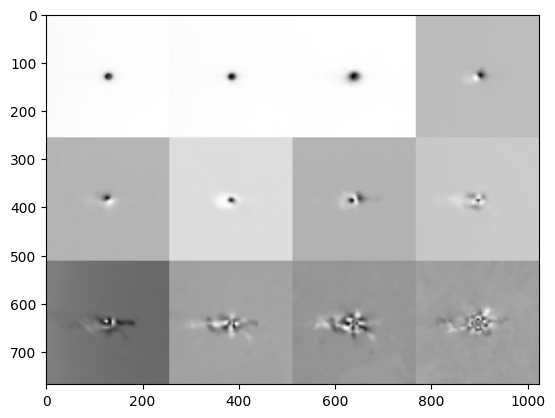

In [4]:
# display "mean face" and "eigenfaces"
#scale image
def scale(np_i):
    np1 = np.copy(np_i)
    np2 = (np1 - np.min(np1)) / np.ptp(np1)
    return np2


#scale and reshape image for visualization
def scale_and_reshape(np_i, mf, old_shape):
    np1 = np.copy(np_i)
    if mf is None:
        np2 = np1.reshape(old_shape, order='F')
    else:
        np2 = (np1 + mf).reshape(old_shape, order='F')
    np2 = scale(np2)
    return np2

mf = scale_and_reshape(mean_face, None, old_shape)
mf = cv2.resize(mf, (256, 256))
#cv2.imshow("mf",mf)

rys = np.zeros((3 * 256, 4 * 256))
rys[0:256, 0:256] = mf
xx = 1
yy = 0

for a in [0, 1, 2, 3, 4, 5, 11, 15, 21, 33, 62]:
    ef0 = scale_and_reshape(v_correct[:,a], mean_face, old_shape)
    ef0 = cv2.resize(ef0, (256, 256))

    rys[(256 * yy):(256 * (yy + 1)), (256 * xx):(256 * (xx + 1))] = ef0
    xx = xx + 1
    if xx % 4 == 0:
        xx = 0
        yy = yy + 1

import matplotlib.pyplot as plt
plt.imshow(rys, cmap='Grays')
plt.show()

In [5]:
# display explained variance
def find_exp_variance(var_exp, w):
    w_sum = 0
    cum_w = w / np.sum(w)
    for a in range(len(cum_w)):
        w_sum += cum_w[a]
        if w_sum > var_exp:
            return a
    return -1

print('50% variance explained in ' + str(find_exp_variance(0.5, w) + 1) + ' PCA dimensions')
print('90% variance explained in ' + str(find_exp_variance(0.90, w) + 1) + ' PCA dimensions')
print('95% variance explained in ' + str(find_exp_variance(0.95, w) + 1) + ' PCA dimensions')
print('99% variance explained in ' + str(find_exp_variance(0.99, w) + 1) + ' PCA dimensions')
print('999% variance explained in ' + str(find_exp_variance(0.999, w) + 1) + ' PCA dimensions')
print('999% variance explained in ' + str(find_exp_variance(0.9999, w) + 1) + ' PCA dimensions')

50% variance explained in 1 PCA dimensions
90% variance explained in 2 PCA dimensions
95% variance explained in 7 PCA dimensions
99% variance explained in 74 PCA dimensions
999% variance explained in 898 PCA dimensions
999% variance explained in 1777 PCA dimensions


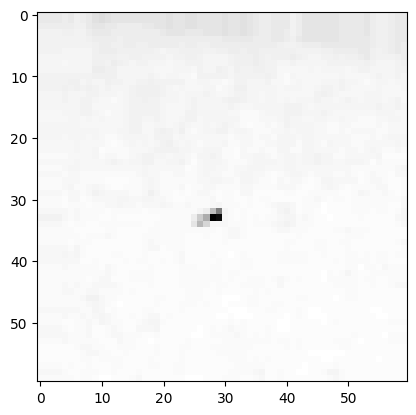

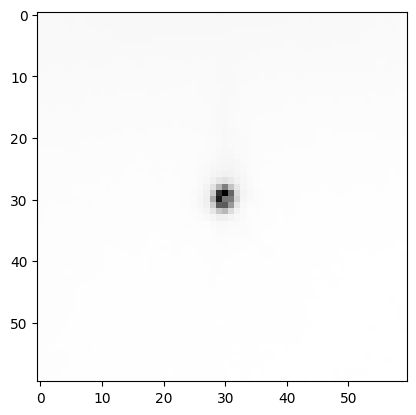

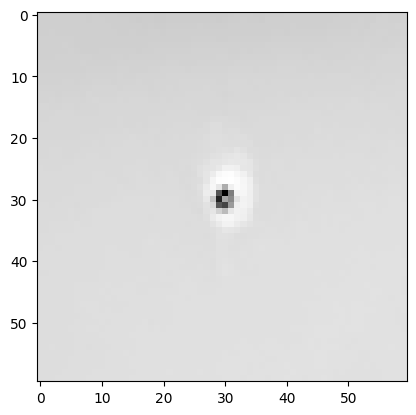

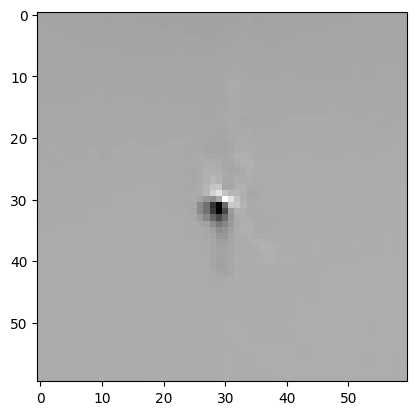

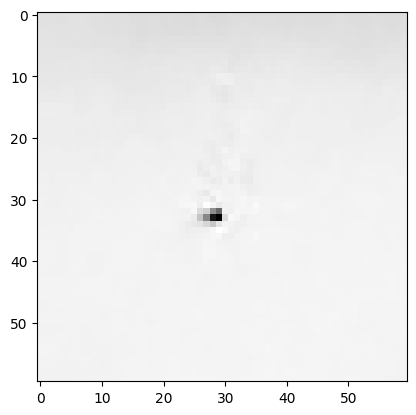

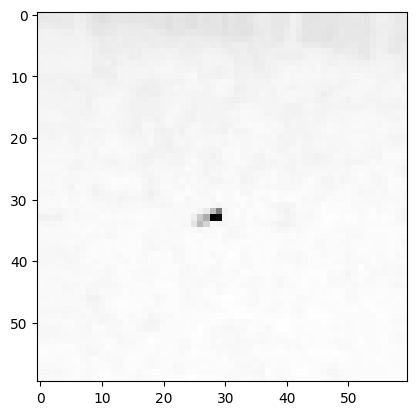

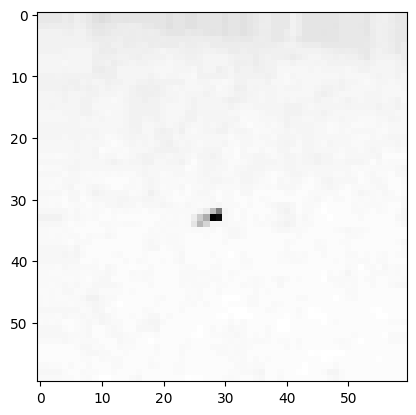

In [6]:
# Calculate embedding

embedding = np.matmul(v.transpose(), T)

# display reconstruction for various number of PCA dims
img_id = 1
def display_reconstruction(how_many_dims):
    img_emb = embedding[0:how_many_dims,img_id]
    img_reconstructed = np.matmul(v[:,0:how_many_dims], img_emb)
    img_reconstructed = (img_reconstructed + mean_face).reshape(old_shape)
    img_reconstructed = 255.0 * img_reconstructed
    plt.imshow(img_reconstructed, cmap='Grays')
    plt.show()

display_reconstruction(embedding.shape[0])
#display_reconstruction(62)
display_reconstruction(find_exp_variance(0.5, w) + 1)
display_reconstruction(find_exp_variance(0.9, w) + 1)
display_reconstruction(find_exp_variance(0.95, w) + 1)
display_reconstruction(find_exp_variance(0.99, w) + 1)
display_reconstruction(find_exp_variance(0.999, w) + 1)
display_reconstruction(find_exp_variance(0.9999, w) + 1)


100%|██████████| 3500/3500 [00:00<00:00, 79706.28it/s]


[10, 3428, 472, 744, 361, 2314, 1929, 1636, 11, 530, 1708, 2867, 1753, 2109, 903, 2539, 12, 941, 2185, 2083, 3228, 3305, 678, 2154, 13, 3003, 1482, 3490, 2285, 2034, 1119, 1643, 14, 868, 1087, 1651, 2352, 1796, 449, 1166, 15, 1073, 446, 2752, 3162, 2244, 2016, 652, 16, 2021, 2809, 2545, 2651, 934, 2257, 923, 17, 3154, 2589, 161, 3022, 3105, 1922, 3174, 18, 170, 939, 2568, 3421, 2609, 74, 3381, 19, 3046, 1079, 843, 169, 1751, 3145, 2517, 20, 3462, 3492, 3058, 857, 3094, 993, 1498, 21, 1582, 2031, 1267, 2491, 2260, 2344, 1290, 22, 478, 1135, 2136, 1064, 570, 1955, 3397, 23, 3101, 781, 2472, 2262, 1819, 2101, 922, 24, 2935, 3005, 1657, 3096, 663, 229, 91, 25, 2063, 1607, 2870, 2546, 2165, 877, 2322]
[0.0, 0.26551617974803643, 0.27166802907296717, 0.2727581351202229, 0.2797150749660877, 0.2878398151258272, 0.2983398508955889, 0.2989688881541771, 0.0, 0.013070251366206698, 0.01866367121216413, 0.022902956799970304, 0.026523683915077506, 0.027667582930848394, 0.029439823024583957, 0.03498154

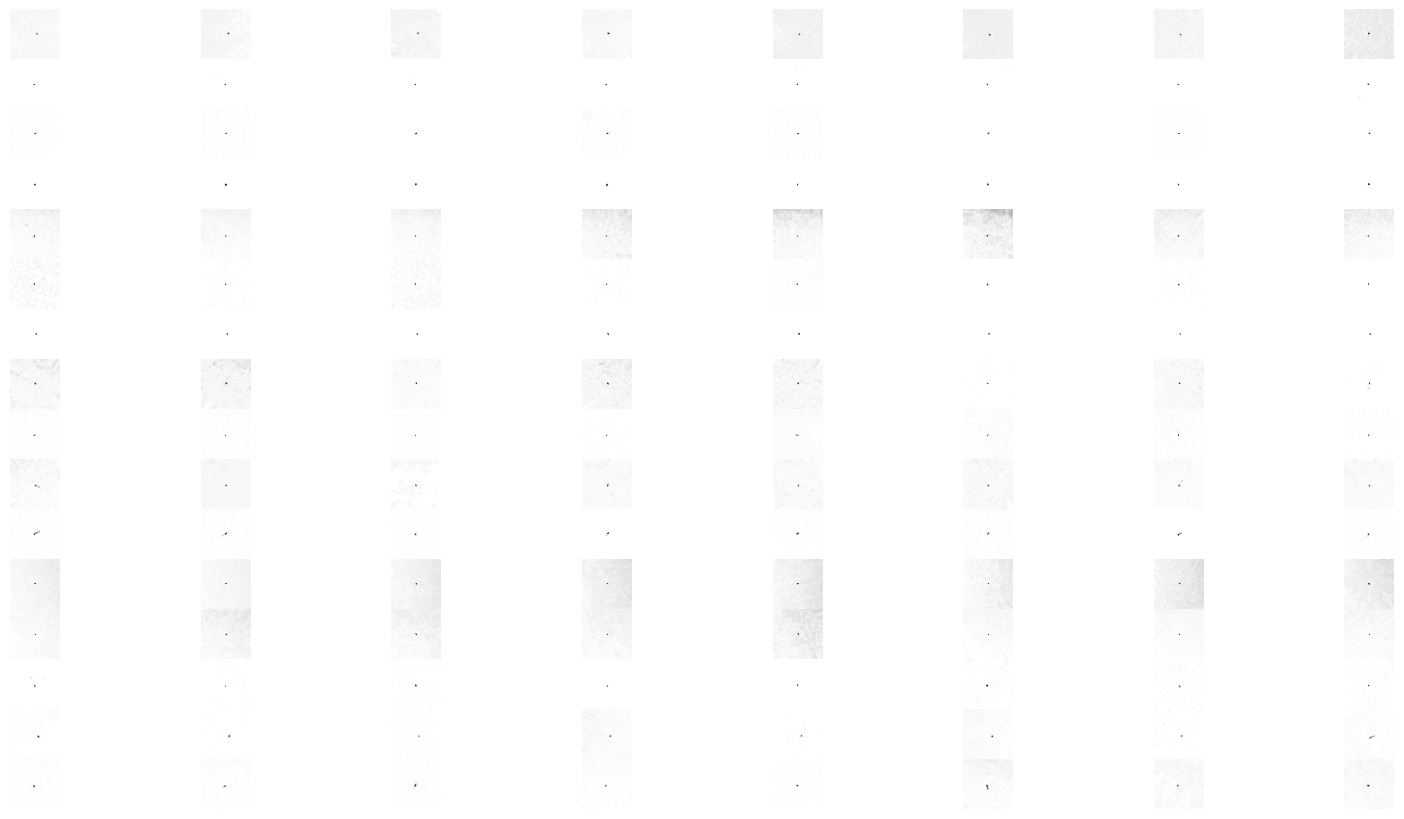

In [7]:
# limit embedding length to certain value, try different values of explained variance ex. 0.95, 0.99 etc.
dim_count = find_exp_variance(0.999, w) + 1
emb_ = embedding[0:dim_count,:]
emb_ = emb_.transpose()
dist = np.zeros(emb_.shape[0])

# set a list of images to which most similar will be found
#my_id_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
my_id_list = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
from tqdm import tqdm
def find_most_similar_from_list(x1):
    # "brute force" search
    for i in tqdm(range(emb_.shape[0])):
        dist[i] = np.linalg.norm(x1 - emb_[i,])

    indices = np.argsort(dist)
    dist_sort = dist[indices]
    return (indices, dist_sort)

my_ids = []
my_dist = []
for my_id in my_id_list:
    (indices, dist_sort) = find_most_similar_from_list(emb_[my_id,])
    _my_ids = indices[0:8]
    _my_dist = dist_sort[0:8]
    my_ids.extend(_my_ids.tolist())
    my_dist.extend(_my_dist.tolist())

import matplotlib.pyplot as plt
columns = 8
fig = plt.figure(figsize=(len(my_id_list), columns))


xx = 0
yy = 0
# display results
for aaa in range(len(my_ids)):
    img_help = T[:,my_ids[aaa]] + mean_face
    img_help = img_help.reshape(old_shape)
    aaa1 = aaa + 1
    fig.add_subplot(len(my_id_list), columns, aaa1)
    plt.axis('off')
    plt.tight_layout(pad=0.00)
    plt.imshow(img_help, cmap='Grays')

print(my_ids)
print(my_dist)
plt.show()


100%|██████████| 3500/3500 [00:02<00:00, 1315.97it/s]


[20, 25, 36, 60, 114, 116, 136, 247, 284, 364, 384, 402, 404, 445, 547, 662, 689, 710, 713, 748, 752, 770, 814, 895, 906, 935, 946, 958, 998, 1122, 1188, 1215, 1257, 1259, 1261, 1270, 1347, 1353, 1372, 1380, 1398, 1439, 1655, 1747, 1801, 1884, 1885, 1892, 1904, 1906, 1943, 1969, 2037, 2105, 2156, 2181, 2190, 2202, 2340, 2389, 2457, 2488, 2629, 2665, 2671, 2677, 2731, 2751, 2758, 2766, 2786, 2794, 2808, 2878, 2888, 2891, 2903, 2939, 3068, 3090, 3193, 3201, 3227, 3240, 3326, 3358, 3385, 3386, 3391, 3408, 3438, 3441, 3452, 3473]
[20, 25, 36, 60, 114, 116, 136, 247, 284, 364, 384, 402, 404, 445, 547, 662, 689, 710, 713, 748, 752, 770, 814, 895, 906, 935, 946, 958, 998, 1122, 1188, 1215, 1257, 1259, 1261, 1270, 1347, 1353, 1372, 1380, 1398, 1439, 1655, 1747, 1801, 1884, 1885, 1892, 1904, 1906, 1943, 1969, 2037, 2105, 2156, 2181, 2190, 2202, 2340, 2389, 2457, 2488, 2629, 2665, 2671, 2677, 2731, 2751, 2758, 2766, 2786, 2794, 2808, 2878, 2888, 2891, 2903, 2939, 3068, 3090, 3193, 3201, 3227, 32

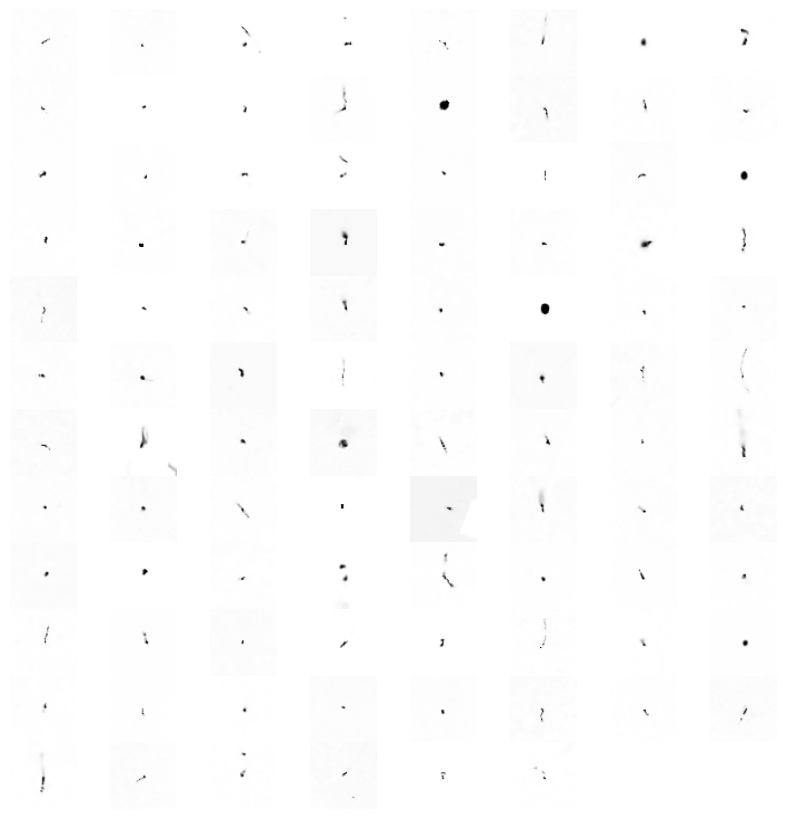

In [9]:
# density-based anomalies detection, parameters have the same role as in DBSCAN
eps=1
min_samples=3

# find objects which do not have at least min_samples objects in eps neighbourhood
# "fast" implementation using numba
import numba as nb
@nb.jit(nopython=True)
def func_nb(emb_array_copy, i, eps, min_samples):
    min_samples_help = 0
    x1 = emb_array_copy[i,]
    for j in range(emb_array_copy.shape[0]):
        if i != j:
            x2 = emb_array_copy[j,]
            dist = np.linalg.norm(x1 - x2)
            if dist < eps:
                min_samples_help = min_samples_help + 1
            if min_samples_help > min_samples:
                return False
    return True

my_ids = []
from tqdm import tqdm
for i in tqdm(range(emb_.shape[0])):
    if func_nb(emb_, i, eps, min_samples):
        my_ids.append(i)

# plot results
print(my_ids)
import matplotlib.pyplot as plt
import cv2
columns = 8
fig = plt.figure(figsize=(columns, columns))
rows = int(len(my_ids) / columns) + 1

columns2 = columns + 1
rows2 = int(len(my_ids) / columns2) + 1
ret_img = np.zeros((128 * rows2, 128 * columns2, 3))

xx = 0
yy = 0
for aaa in range(len(my_ids)):
    img_help = T[:,my_ids[aaa]] + mean_face
    img_help = img_help.reshape(old_shape)

    aaa1 = aaa + 1
    fig.add_subplot(rows, columns, aaa1)

    plt.axis('off')
    plt.tight_layout(pad=0.00)

    plt.imshow(img_help, cmap='Grays')


print(my_ids)
plt.show()